In [ ]:
# Import libraries

import sklearn.model_selection
import sklearn.preprocessing
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
# import glob
import cv2 
import PIL
import shutil
import random

In [ ]:
# All of our data stored on google team drive and imported from there
from google.colab import drive

drive.mount('/content/drive', force_remount=True)



# display(get_ipython())
# nRowsRead = None # specify 'None' if want to read whole file
# folder = '/content/gdrive/DS Portfolio Projects/Contrail_and_Cloud_Classifier/CCSN/CCSN_v2/St'
# data_path = os.path.join(folder) 
# files = glob.glob(data_path)
# Using '*' pattern [what???]
# print('\nNamed with wildcard *:')
# for name in glob.glob('/content/drive/DS Portfolio Projects/Contrail_and_Cloud_Classifier/CCSN/CCSN_v2/St/*'):
#     print(name)
# data = []
# for f1 in files:
#   img = cv2.imread(f1)
#   data.append(img)
# print(len(data))

Mounted at /content/drive


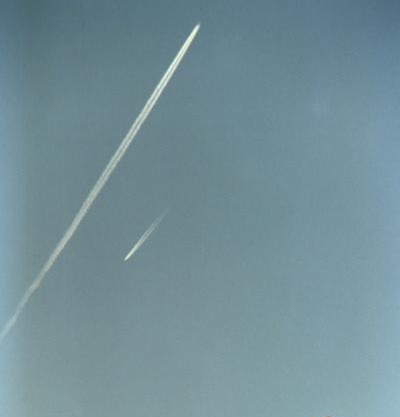

In [ ]:
from  PIL import Image

img = Image.open('/content/drive/My Drive/DS Portfolio Projects/Contrail_and_Cloud_Classifier/Contrail_Files/18_contrails_crossingb.jpg')
img

In [ ]:
all_contrails = ('/content/drive/My Drive/DS Portfolio Projects/Contrail_and_Cloud_Classifier/Contrail_Files/')

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


In [ ]:
# Sebastian setup the variables x and y here
# x (n x d) = cloud + contrails data 
# y (n x 1) = binary label data [cloud, contrail]
# Where cloud = 0  and contrail = 1

#df.dataframeName = 'St_clouds.csv'
#display(df.shape)
#display(df.dtypes)
#display(df.columns)
#display(df['class'].value_counts(normalize=True))

In [ ]:
# Ensure that all images are about the same resolution
# Verify the color gambit of the images, they should be (blue, and white)
# Remove photos that are too large or too small
# Print out 10 random images from each dataset (cloud and contrail)
# Ensure that images are from the ground looking up in the day without a fish eye effect.
# Make sure there are pictures of empty skies as well, those count as clouds


In [ ]:
# Processing to balance the dataset 
# Transforming, flipping, and modifying images
# Goal: Make the contrail data set as large as the cloud dataset


In [ ]:
# Validate that the balanced dataset fits well
# Print out side by side of transformations and the original image

In [ ]:
# TensorFlow model below
# Uses convolution, maxpooling, dropout, and flatten layers
# Sets up dense CNN model with keras
import tensorflow as tf
from tensorflow.keras import layers, models

# Layers working with image data
model = models.Sequential()
model.add(layers.Conv2D(64, (11, 11), activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.01), input_shape=(84, 173, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (5, 5), activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(layers.MaxPooling2D((3, 3)))

# Fully connected layer with collapsed feature space
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(df['classID'].value_counts()), activation = "softmax"))
model.summary()

In [ ]:
# Set a compiler
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
# Standardizing the data
MaxAbsScaler().fit(x)
X = transformer.transform(x)
# Setup the training and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 53)


In [ ]:
# Fit the data
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test), 
                    callbacks=[learning_rate_reduction])

In [ ]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()